# Economic vs EV sales

In this NoteBook, the economic impact of new energy vehicles is discussed, including GDP, and income.

In [38]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
from scipy import stats

## Parameters 

In [39]:
EV_SALE_DATASET = '../Processed_Data/Ev_sales.csv'
GDP_DATASET = '../Processed_Data/gdp.csv'
INCOME_DATASET = '../Processed_Data/incomes.csv'
POPULATION_DATASET = '../Processed_Data/population.csv'

# Load Datasets
## Load the EV sales dataset

In [40]:
df_EV = pd.read_csv(EV_SALE_DATASET,index_col=[0]).set_index("State")
print(df_EV.shape)
df_EV.head()

(51, 4)


,2016,2017,2018,2019
State,,,,
California,73854,94873,153442,145020
New York,6043,10090,15752,14823
Washington,5363,7068,12650,12172
Florida,6255,6573,13705,15794
Texas,4510,5419,11764,5780


## Load the GDP dataset

In [41]:
df_GDP = pd.read_csv(GDP_DATASET,index_col=[0]).sort_values('GeoName').set_index('GeoName')
print(df_GDP.shape)
df_GDP.head()

(51, 24)


,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
GeoName,,,,,,,,,,,,,,,,,,,,,
Alabama,61083.8,64168.6,67225.1,69764.4,72038.4,74152.3,77085.0,81588.9,86356.8,91148.0,...,98890.3,100372.5,102206.9,106036.8,110031.4,112854.1,116653.1,121648.4,126982.8,129730.7
Alaska,12347.8,12889.6,13127.5,13893.0,14883.3,15703.7,16522.0,17454.3,18584.7,19600.3,...,24458.4,25739.1,26362.2,27139.9,27826.3,27170.6,27133.0,28299.9,29108.0,28797.9
Arizona,69876.9,77166.0,82849.8,91205.4,95475.5,98041.6,102681.4,111133.6,121777.9,134607.4,...,139617.8,145243.2,150331.8,156465.4,163929.0,170624.3,180958.5,193037.3,204327.8,214073.1
Arkansas,32715.5,34880.9,36741.0,38766.8,40397.1,41662.0,43485.7,46064.2,48480.3,51110.2,...,56870.0,59196.2,60545.9,62563.9,64679.8,66179.6,68619.4,70996.5,73514.4,75295.1
California,574432.9,625411.7,681068.5,768199.0,786778.9,793668.6,826979.8,881668.6,926929.3,980936.4,...,1059293.2,1113411.5,1157678.6,1225532.5,1313766.3,1371402.0,1452842.6,1531503.1,1615149.1,1658813.1


## Load the income dataset

In [42]:
df_Income = pd.read_csv(INCOME_DATASET,index_col=[0]).sort_values('GeoName').set_index("GeoName")
print(df_Income.shape)
df_Income.head()

(51, 74)


,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
GeoName,,,,,,,,,,,,,,,,,,,,,
Alabama,10467.9,10252.7,12141.1,13719.4,14571.1,14331.5,16687.0,17907.4,18931.3,20113.4,...,491754.4,790033.1,1185940.7,1629938.5,2175204.7,2680407.0,3251615.6,561796.4,4097666.7,10591485.7
Alaska,0.0,343.4,1834.8,2453.7,2598.4,2486.0,2633.0,2723.0,2688.8,2842.0,...,103757.3,172710.3,231480.8,299836.3,418046.7,593095.3,695672.9,95956.2,807784.7,2192509.1
Arizona,3738.2,3917.6,4731.7,5915.6,6359.8,6732.2,7652.7,8771.7,9488.8,10717.6,...,414098.9,784716.8,1197632.4,1967944.9,2999854.9,3653468.2,4894171.6,569427.7,4364393.0,13481460.5
Arkansas,6429.8,6002.5,6961.9,7638.7,7717.7,7672.4,8583.4,8753.5,9244.4,10108.6,...,280218.7,440516.1,644009.5,916271.4,1254655.3,1612672.7,2048814.3,321698.4,2281015.7,6264201.1
California,73098.0,76086.4,89729.5,104507.7,114912.5,120629.2,136485.1,150933.0,161009.6,179496.7,...,4474919.5,7767454.3,11280953.2,16209227.0,22363039.0,27437210.9,37870143.0,5844770.9,39732554.0,110884678.8


## Load the population dataset

In [43]:
df_Population = pd.read_csv(POPULATION_DATASET).sort_values('Unnamed: 0').set_index("Unnamed: 0")
print(df_Population.shape)
df_Population.head()

(52, 12)


,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unnamed: 0,,,,,,,,,,,,
Alabama,4779736.0,4780125.0,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
Alaska,710231.0,710249.0,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
Arizona,6392017.0,6392288.0,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
Arkansas,2915918.0,2916031.0,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
California,37253956.0,37254519.0,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


## Merge into one dataframe

In [44]:
df_economic = pd.concat([df_Income['2019'].rename('income'), \
                               df_GDP['2019'].rename('GDP'),\
                               df_EV['2019'].rename('EV_sale'),
                        df_Population['2019'].rename('Population')],\
                              axis = 1)
df_economic = df_economic.dropna()
print(df_economic.shape)
df_economic.head()

(51, 4)


,income,GDP,EV_sale,Population
Alabama,561796.4,126982.8,1007.0,4903185.0
Alaska,95956.2,29108.0,143.0,731545.0
Arizona,569427.7,204327.8,7591.0,7278717.0
Arkansas,321698.4,73514.4,538.0,3017804.0
California,5844770.9,1615149.1,145020.0,39512223.0


In [45]:
df_economic['EV_Sales_per_capita'] = df_economic['EV_sale'] /df_economic['Population'] 
df_economic.head()

,income,GDP,EV_sale,Population,EV_Sales_per_capita
Alabama,561796.4,126982.8,1007.0,4903185.0,0.000205
Alaska,95956.2,29108.0,143.0,731545.0,0.000195
Arizona,569427.7,204327.8,7591.0,7278717.0,0.001043
Arkansas,321698.4,73514.4,538.0,3017804.0,0.000178
California,5844770.9,1615149.1,145020.0,39512223.0,0.003670


# Analyze Economic, GDP vs Income

We will use a scatter plot to represent their relationship from the prominent cities analysed. The cities with the highest gdp, income and the lowest gdp and income respectively

In [46]:
highest_income = df_economic.sort_values(by='income',ascending=False).index[0]
highest_gdp = df_economic.sort_values(by='GDP',ascending=False).index[0]

lowest_income = df_economic.sort_values(by='income',ascending=True).index[0]
lowest_gdp = df_economic.sort_values(by='GDP',ascending=True).index[0]
highest_income, highest_gdp, lowest_income, lowest_gdp

('California', 'California', 'Wyoming', 'Wyoming')

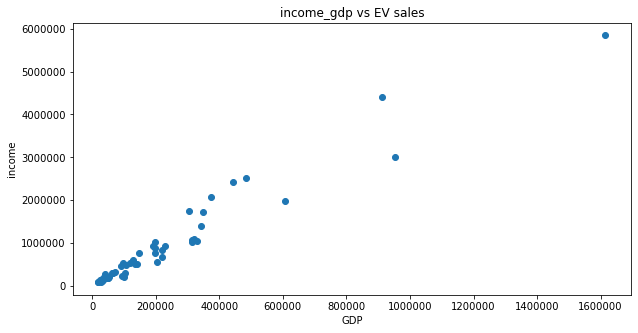

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(df_economic['GDP'],df_economic['income'])
plt.title("income_gdp vs EV sales")
plt.xlabel("GDP")
plt.ylabel("income")
plt.show()

#### We can see that GDP and income are proportional, but there is a lack of indication of EV sales. Each point represents a state, so we use EV sales to assign a size to the points

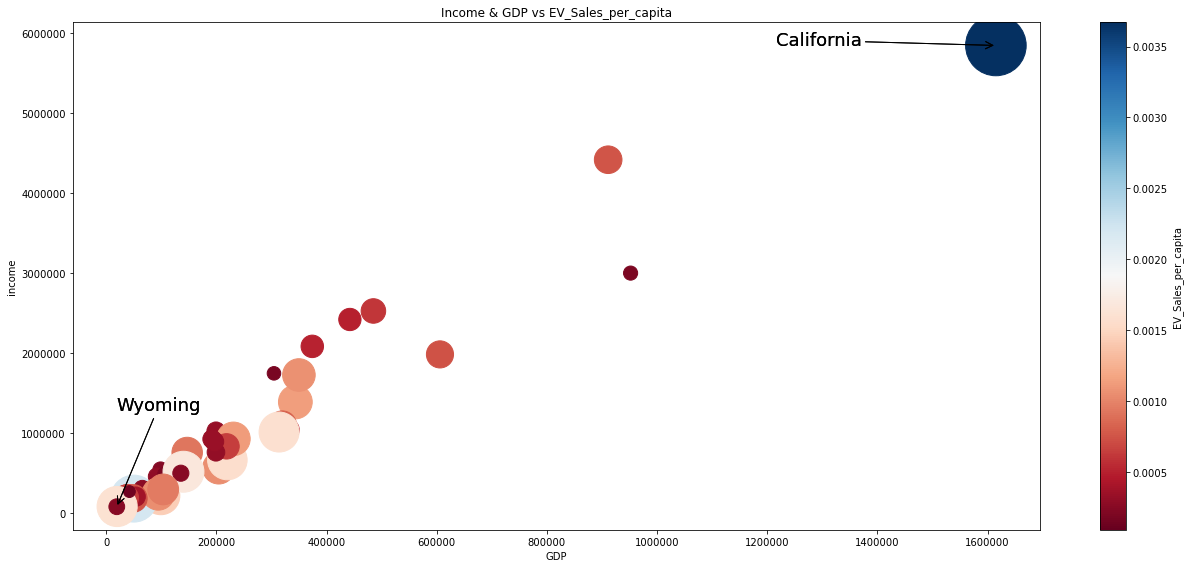

In [48]:
def draw(df_economic, ax, size_scale=1000000, *args, **kwargs):
    df_economic.plot.scatter(x='GDP',y='income',s=(df_economic['EV_Sales_per_capita'])*size_scale, ax=ax,*args, **kwargs)
fig, ax = plt.subplots(figsize=(18,8))
ax.ticklabel_format(style='plain')
draw(df_economic, ax, c='EV_Sales_per_capita', colormap='RdBu', colorbar=True)
## hightlight states
plt.annotate(highest_income, xy = (df_economic.loc[highest_income][['GDP', 'income']]), xytext = df_economic.loc[highest_income][['GDP', 'income']] +(-400000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(highest_gdp, xy = (df_economic.loc[highest_gdp][['GDP', 'income']]), xytext = df_economic.loc[highest_gdp][['GDP', 'income']] +(-400000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (df_economic.loc[lowest_income][['GDP', 'income']]), xytext = df_economic.loc[lowest_income][['GDP', 'income']] +(-0, +1200000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (df_economic.loc[lowest_income][['GDP', 'income']]), xytext = df_economic.loc[lowest_income][['GDP', 'income']] +(-0, +1200000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )

plt.title("Income & GDP vs EV_Sales_per_capita")
ax.set_xlabel('GDP')
ax.set_ylabel('income')
fig.tight_layout()

#### The highest as well as the lowest revenues and gdp correspond to the highest and lowest sales respectively. This is similar to our forecast. But the data for California is too large for us to see a significant change. So we removed California

In [49]:
highest_income = df_economic.drop("California").sort_values(by='income',ascending=False).index[0]
highest_gdp = df_economic.drop("California").sort_values(by='GDP',ascending=False).index[0]

lowest_income = df_economic.drop("California").sort_values(by='income',ascending=True).index[0]
lowest_gdp = df_economic.drop("California").sort_values(by='GDP',ascending=True).index[0]
highest_income, highest_gdp, lowest_income, lowest_gdp

('New York', 'Texas', 'Wyoming', 'Wyoming')

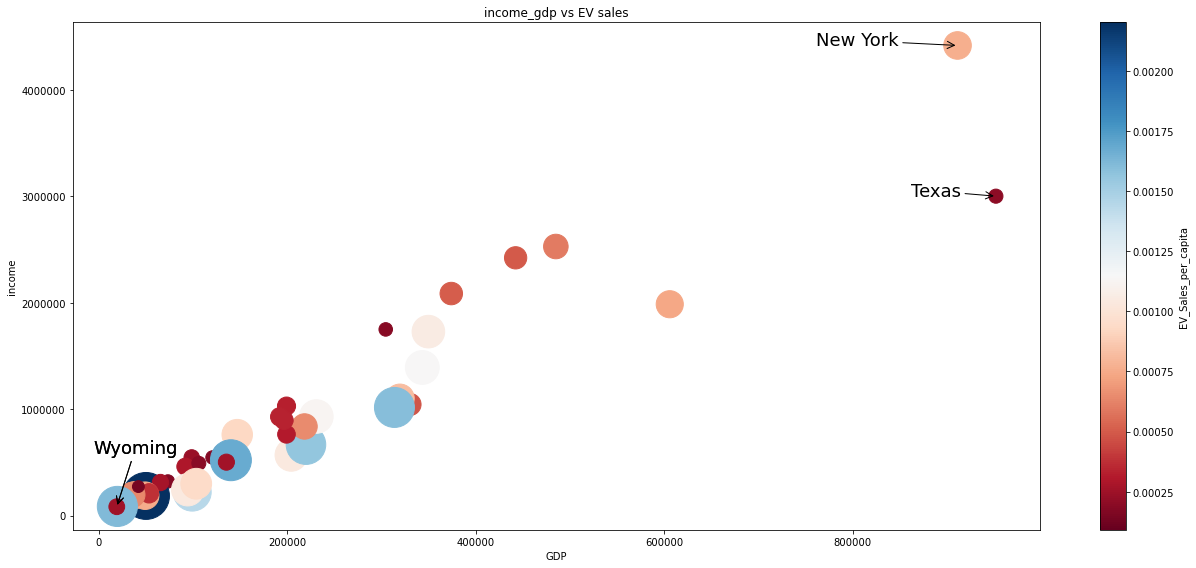

In [50]:
df_economic = df_economic.drop("California")
fig, ax = plt.subplots(figsize=(18,8))
ax.ticklabel_format(style='plain')
draw(df_economic, ax, c='EV_Sales_per_capita', colormap='RdBu', colorbar=True)


plt.annotate(highest_income, xy = (df_economic.loc[highest_income][['GDP', 'income']]), xytext = df_economic.loc[highest_income][['GDP', 'income']] +(-150000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(highest_gdp, xy = (df_economic.loc[highest_gdp][['GDP', 'income']]), xytext = df_economic.loc[highest_gdp][['GDP', 'income']] +(-90000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (df_economic.loc[lowest_income][['GDP', 'income']]), xytext = df_economic.loc[lowest_income][['GDP', 'income']] +(-25000, +500000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (df_economic.loc[lowest_income][['GDP', 'income']]), xytext = df_economic.loc[lowest_income][['GDP', 'income']] +(-25000, +500000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )


plt.title("income_gdp vs EV sales")
ax.set_xlabel('GDP')
ax.set_ylabel('income')
fig.tight_layout()

# Save as png image
fig.savefig('./Images/Income_GDP_vs_EVsales.png', format='png')

#### The change in the data is now becoming more apparent: a proportional trend. But the highest GDP corresponds not to the highest sales, the highest income corresponds to the highest sales. So which factor has the greatest influence on the factor of sales, GDP?

We will model each of these two factors to derive R^2. The correlation will be derived from the magnitude of R^2

In [51]:
## df_EV.head(), df_gdp.head(), df_income.head()

In [52]:
df_economic.head()

,income,GDP,EV_sale,Population,EV_Sales_per_capita
Alabama,561796.4,126982.8,1007.0,4903185.0,0.000205
Alaska,95956.2,29108.0,143.0,731545.0,0.000195
Arizona,569427.7,204327.8,7591.0,7278717.0,0.001043
Arkansas,321698.4,73514.4,538.0,3017804.0,0.000178
Colorado,667379.3,219975.9,9007.0,5758736.0,0.001564


# GDP

C:\Users\21007\AppData\Local\Temp/ipykernel_4936/1273668564.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


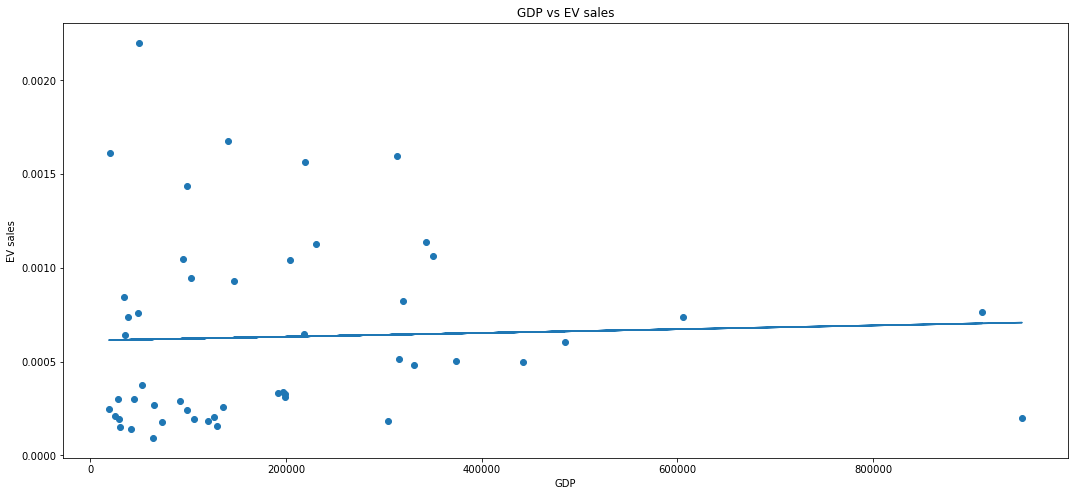

In [55]:
import scipy.integrate 

m, b, r_value, p_value, std_err = scipy.stats.linregress(df_economic['GDP'], df_economic['EV_Sales_per_capita'])

fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(df_economic['GDP'],df_economic['EV_Sales_per_capita'])
ax.plot(df_economic['GDP'], m*df_economic['GDP'] + b)
ax.annotate('r^2= ' + str("{:.2f}".format(r_value**2)), xy=(1950,15000),fontsize=20)
ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,13000),fontsize=20)

plt.title("GDP vs EV sales")
ax.set_xlabel('GDP')
ax.set_ylabel('EV sales')

fig.show()

# Save as png image
fig.savefig('./Images/GDP_vs_EVsales.png', format='png')

# Income

C:\Users\21007\AppData\Local\Temp/ipykernel_4936/839325465.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


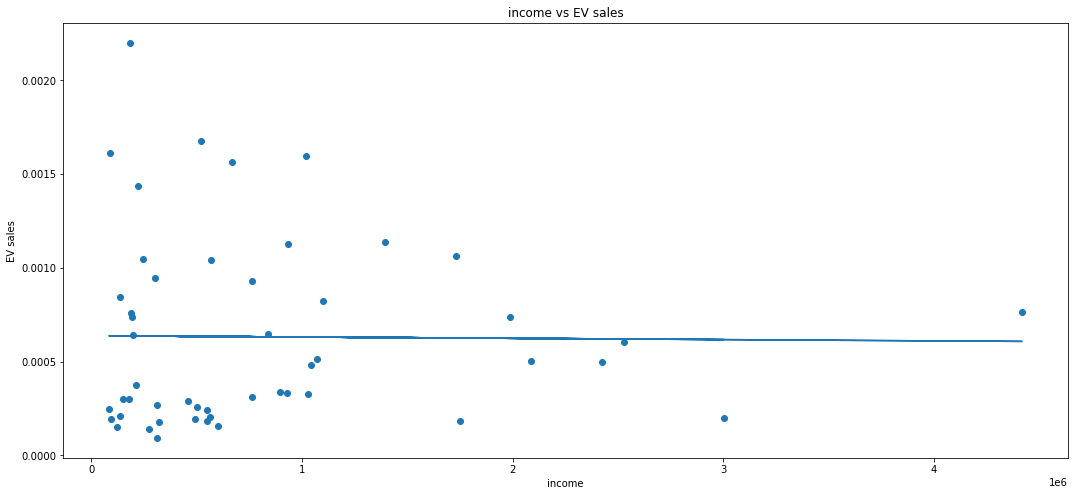

In [56]:
m, b, r_value, p_value, std_err = scipy.stats.linregress(df_economic['income'], df_economic['EV_Sales_per_capita'])

fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(df_economic['income'],df_economic['EV_Sales_per_capita'])
ax.plot(df_economic['income'], m*df_economic['income'] + b)
ax.annotate('r^2= ' + str("{:.2f}".format(r_value**2)), xy=(1950,15000),fontsize=20)
ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,13000),fontsize=20)

plt.title("income vs EV sales")
ax.set_xlabel('income')
ax.set_ylabel('EV sales')

fig.show()

# Save as png image
fig.savefig('./Images/Income_vs_EVsales.png', format='png')

## Conclusion

GDP and income are directly proportional. They are each directly proportional to EV sales. However, GDP usually has a greater impact on sales, according to the value of R^2